## Linear Regression - SAT-GPA

In [95]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

     SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]


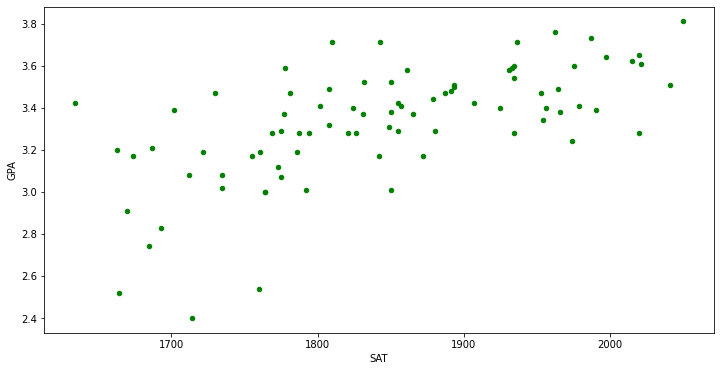

In [96]:
#Creating dataframe from csv file and inspecting data
df_sat = pd.read_csv('/content/sat-gpa-dataset.csv')
print(df_sat)
df_sat.plot.scatter(x='SAT', y='GPA', color='green', figsize=(12, 6))
plt.show()

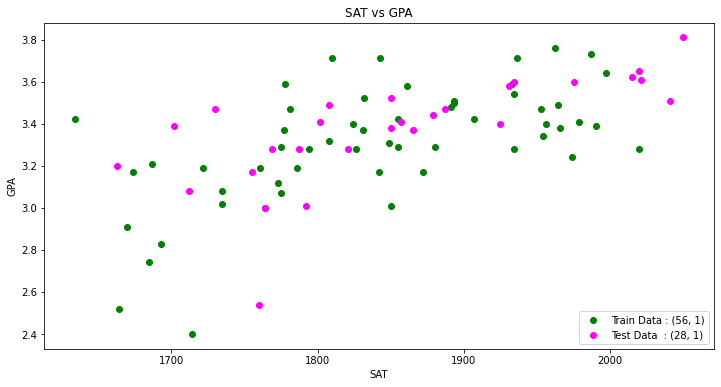

In [97]:
# Split train and test data
from sklearn.model_selection import train_test_split

#Extracting series from pandas dataframe x <- df_sat['SAT'], y <- df_sat['GPA']
#and reshaping to a 2D numpy.ndarray
x = df_sat['SAT'].values.reshape(-1, 1)
y = df_sat['GPA'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=2/3,
                                                    random_state=0)
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, color='green')
plt.scatter(x_test, y_test, color='magenta')
plt.legend([f'Train Data : {x_train.shape}', 
            f'Test Data  : {x_test.shape}'], 
            loc="lower right")
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('SAT vs GPA')
plt.show()

In [98]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

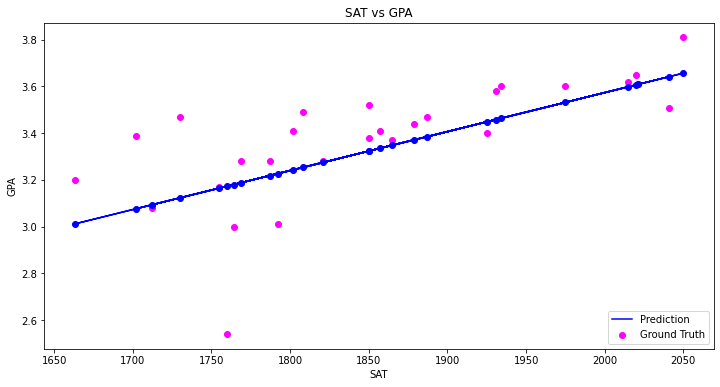

In [99]:
plt.figure(figsize=(12, 6))
#plt.scatter(x_train, y_train, color='green')
plt.scatter(x_test, y_test, color='magenta')
plt.scatter(x_test, y_pred, color='blue')
plt.plot(x_test, y_pred, color='blue')
plt.legend(['Prediction', 'Ground Truth'], loc="lower right")
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('SAT vs GPA')
plt.show()

## Evaluate performance - Mean Square Error(MSE) & Mean Absolute Error(MAE)

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('MSE ', mean_squared_error(y_test, y_pred))
print('MAE ', mean_absolute_error(y_test, y_pred))

MSE  0.034788883960298854
MAE  0.13167984620982928


## Tryng out a different split

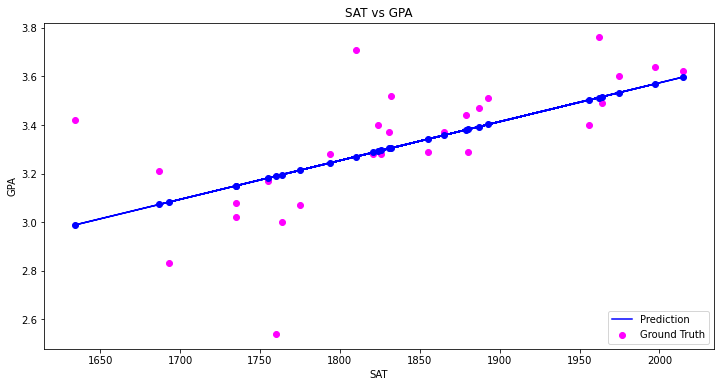

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=2/3,
                                                    random_state=191)
regressor_191 = LinearRegression()
regressor_191.fit(x_train, y_train)
y_pred = regressor_191.predict(x_test)

plt.figure(figsize=(12, 6))
plt.scatter(x_test, y_test, color='magenta')
plt.scatter(x_test, y_pred, color='blue')
plt.plot(x_test, y_pred, color='blue')
plt.legend(['Prediction', 'Ground Truth'], loc="lower right")
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('SAT vs GPA')
plt.show()

In [102]:
print('MSE ', mean_squared_error(y_test, y_pred))
print('MAE ', mean_absolute_error(y_test, y_pred))

MSE  0.040885916848492423
MAE  0.13743172287171174


In [103]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s